In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ="/content/drive/Othercomputers/My Laptop/Google Drive/imarticus python/Deep learning/"

In [ ]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

chest-xray-covid19-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip chest-xray-covid19-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


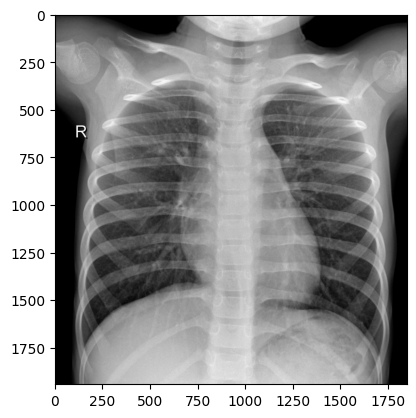

In [ ]:
%pylab inline
img=mpimg.imread('/content/Data/train/NORMAL/NORMAL(1002).jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img.shape

(1943, 1851, 3)

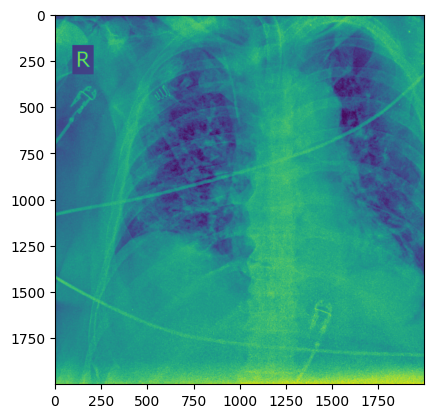

In [ ]:
img=mpimg.imread('/content/Data/train/COVID19/COVID19(0).jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img.shape

(2000, 2000)

Populating the interactive namespace from numpy and matplotlib


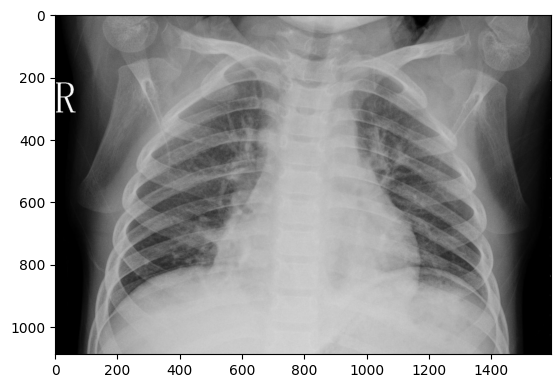

In [ ]:
%pylab inline
img=mpimg.imread('/content/Data/train/PNEUMONIA/PNEUMONIA(1001).jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
img_width, img_height = 224,224  #width and height of the images
train_data_dir = r"/content/Data/train"
validation_data_dir=r"/content/Data/test"
nb_train_sample =100
nb_validation_samples =100
epochs =50
batch_size= 10

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

In [ ]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
test_datagen=ImageDataGenerator (rescale=1. /255)

In [ ]:
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size, class_mode='categorical',classes=['COVID19','NORMAL','PNEUMONIA'])

Found 5144 images belonging to 3 classes.


In [ ]:
validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='categorical')

Found 1288 images belonging to 3 classes.


In [ ]:
model = Sequential()
#Block1
model.add(Conv2D(64, (3,3), padding = 'same',input_shape = input_shape))
# model.add(Conv2D(64, (3,3), padding = 'same',input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Block2
model.add(Conv2D(128, (3,3),input_shape = input_shape))
# model.add(Conv2D(128, (3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Block3
model.add(Conv2D(256, (3,3),input_shape = input_shape))
# model.add(Conv2D(256, (3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Block4
model.add(Conv2D(512, (3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Classification
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(128))
model.add(Dense(128))
model.add(Dense(3))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 128)     73856     
                                                                 
 activation_1 (Activation)   (None, 110, 110, 128)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 128)      0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callback=EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [ ]:
training = model.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,
                            callbacks=callback )

<ipython-input-32-d9a7bfa089f4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(train_generator,


Epoch 1/50
100/100 [==============================] - 95s 798ms/step - loss: 0.9296 - accuracy: 0.6540 - val_loss: 0.7554 - val_accuracy: 0.6710
Epoch 2/50
100/100 [==============================] - 81s 811ms/step - loss: 0.6990 - accuracy: 0.7070 - val_loss: 0.7798 - val_accuracy: 0.6910
Epoch 3/50
100/100 [==============================] - 81s 808ms/step - loss: 0.5658 - accuracy: 0.7710 - val_loss: 0.3559 - val_accuracy: 0.8960
Epoch 4/50
100/100 [==============================] - 82s 827ms/step - loss: 0.4966 - accuracy: 0.8070 - val_loss: 0.3383 - val_accuracy: 0.8750
Epoch 5/50
100/100 [==============================] - 80s 807ms/step - loss: 0.4571 - accuracy: 0.8190 - val_loss: 0.2432 - val_accuracy: 0.9060
Epoch 6/50
100/100 [==============================] - 79s 794ms/step - loss: 0.4008 - accuracy: 0.8510 - val_loss: 0.2370 - val_accuracy: 0.9250
Epoch 7/50
100/100 [==============================] - 79s 794ms/step - loss: 0.4213 - accuracy: 0.8360 - val_loss: 0.3786 - val_ac

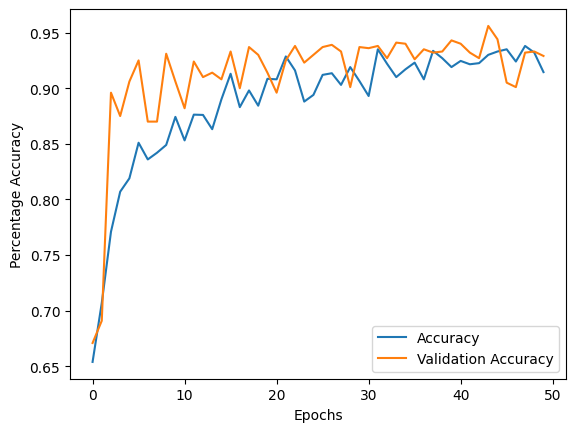

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Percentage Accuracy')
plt.show()

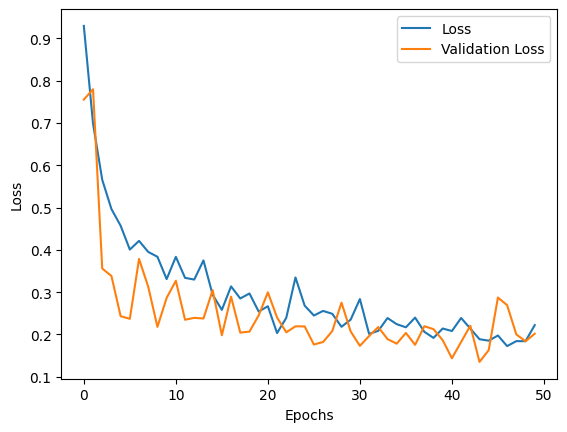

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

TRANSFER LEARNING




In [ ]:
from keras import optimizers
from keras.applications import InceptionResNetV2
from keras.models import Model
from keras import applications

In [ ]:
pre_trained_model = InceptionResNetV2(input_shape=input_shape, include_top=False, weights="imagenet")

219055592/219055592 [==============================] - 11s 0us/step


In [ ]:
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block35_1_ac')
last_output = last_layer.output

In [ ]:
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = Dense(3, activation='softmax')(x)

model1 = Model(pre_trained_model.input, x)

In [ ]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_4[0][0]']               
 alization)                     )                                                             

In [ ]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
training_1 = model1.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/Data/train/COVID19/COVID19(2).jpg",target_size=(224,224))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

In [ ]:
# using model of transfer learning
rslt = model1.predict(img_pred)
rslt

1/1 [==============================] - 0s 20ms/step


array([[0., 1., 0.]], dtype=float32)

In [ ]:
if rslt[0][0]==0:
    prediction ="COVID19"
elif rslt[0][0]==1:
    prediction='NORMAL'
else:
    prediction ="PNEUMONIA"
print('Prediction: ',prediction)

Prediction:  COVID19
